## Imports

In [4]:
import sys
sys.path.append('python/')
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
import scipy.optimize as opt
import dataPython as dp
from scipy.integrate import quad
import scipy.optimize as so
import scipy.special as ss

## Disk

At r=6.339[kpc]: 152067592.03860623
At r=6.342[kpc]: 152016341.9378595


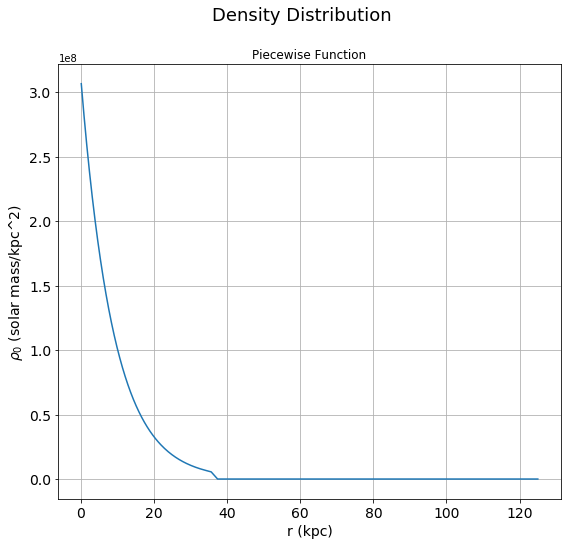

At r=6.339[kpc]: -17086246.296472605
At r=6.342[kpc] -17080487.858186457


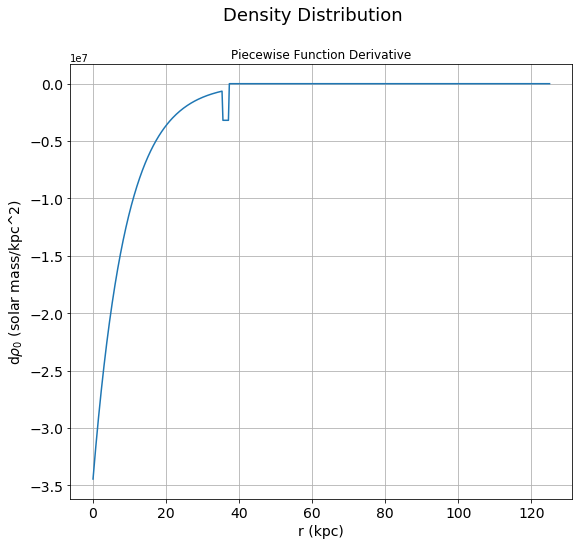

Function at r=6.339[kpc]: 152067592.038606
Function at r=6.342[kpc]: 152016341.937860
Derivative at r=6.339[kpc]: -17086246.296472605
Derivative at r=6.342[kpc]: -17080487.858186457


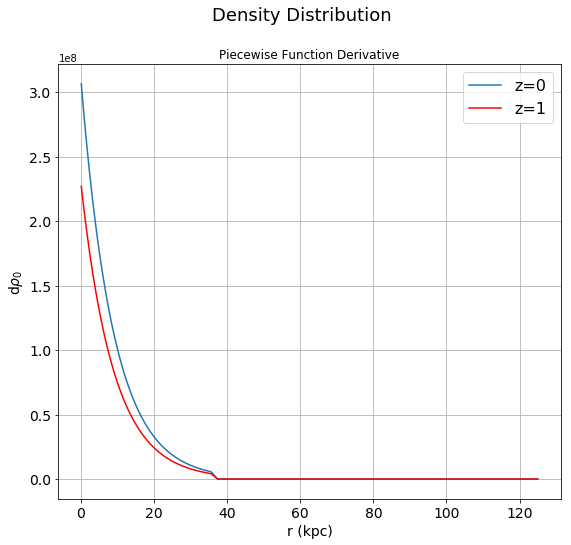

At RA=ZA=2: 85627549.80849361


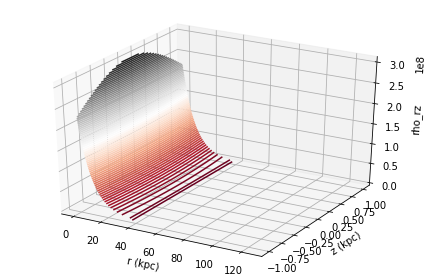

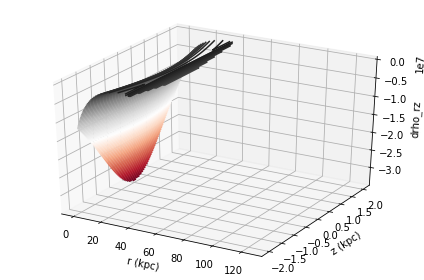

At r=u=xi=1: 0.35734399698214614
At r=u=z=1: -8486222.452085793


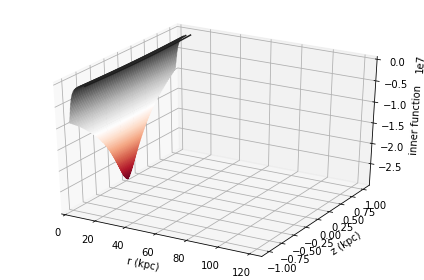

../NGC5533_Final/Disk_Velocity_kpc.ipynb:3: RuntimeWarning: overflow encountered in cosh
  {


At r=u=1: -25163286.69048213
At r=10[kpc]: -238575958.71734738
L0: 37670379898.39093
Mdblintrho: 80061849225.77023


../NGC5533_Final/Disk_Velocity_kpc.ipynb:3: RuntimeWarning: overflow encountered in cosh
  {
../NGC5533_Final/Disk_Velocity_kpc.ipynb:2: RuntimeWarning: invalid value encountered in double_scalars
  "cells": [
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: Extremely bad integrand behavior occurs at some points of the
  integration interval.
  warnings.warn(msg, IntegrationWarning)


F at r=1[kpc]: nan


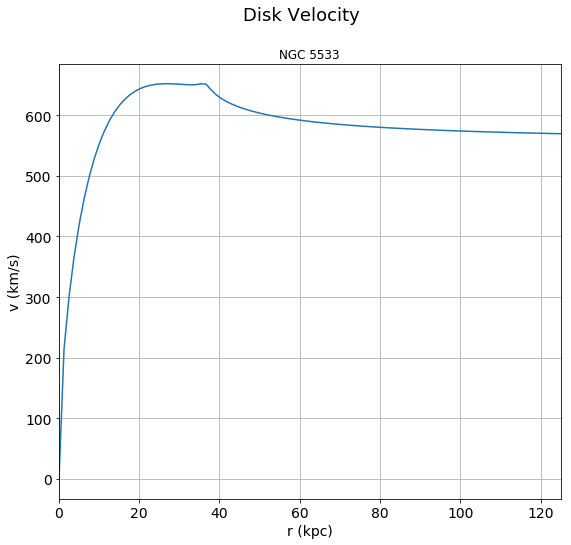

In [6]:
%run ../NGC5533_Final/Disk_Velocity_kpc.ipynb

In [13]:
##Noordermeer's Disk curve
data_disk_nord = dp.getXYdata('data/NGC5533-disk_fmt.txt')

#convert to numpy arrays
r_d_nordold = np.asarray(data_disk_nord['xx'])
v_d_nordold = np.asarray(data_disk_nord['yy'])

print(len(r_d_nordold))

#getting data down to 100 points to be comparable to function

#rdata
i=0
r_d_nord = np.zeros((int(100)))
while i<len(r_d_nord):
    r_d_nord[i]=r_d_nordold[4*i]
    i +=1

#vdata
i=0
v_d_nord = np.zeros((int(100)))
while i<len(v_d_nord):
    v_d_nord[i]=v_d_nordold[4*i]
    i +=1
    
print(len(r_d_nord))
print(len(rd))

880
100
100


In [16]:
##Main function
def v(r,c):
    return c*vd

#(troubleshooting)seeing if values are decreasing
i = 0
while i < len(r_d_nord)-1:
    print(r_d_nord[i+1] - r_d_nord[i])
    i += 1

0.02310000000000001
-0.0005000000000000004
0.0232
-0.0005999999999999894
-0.0005000000000000004
0.02310000000000001
0.023099999999999954
0.02310000000000001
0.02310000000000001
0.022999999999999965
0.046800000000000064
0.04679999999999995
0.02300000000000002
0.0232
0.07030000000000003
0.04679999999999995
0.07040000000000002
0.09440000000000004
0.09440000000000004
0.09439999999999982
0.09440000000000004
0.09450000000000003
0.09440000000000004
0.09440000000000004
0.09450000000000003
0.09450000000000003
0.0947
0.0944999999999998
0.09460000000000002
0.09440000000000026
0.0945999999999998
0.09450000000000003
0.09439999999999982
0.09420000000000028
0.09439999999999982
0.09430000000000005
0.09430000000000005
0.09430000000000005
0.09439999999999982
0.09410000000000007
0.09419999999999984
0.07060000000000022
0.09410000000000007
0.09419999999999984
0.09419999999999984
0.09430000000000005
0.09410000000000007
0.09430000000000005
0.09419999999999984
0.09420000000000028
0.09420000000000028
0.0942999

In [17]:
#LMFIT FITTING
#Setup
#weighdata = 1/sigdata                      #We will need weights for lmfit. This tells us how much to account for a single data point in the fit.
l_mod = lf.Model(v)                         #Tell lmfit that we want to model the function f
params = l_mod.make_params(c=1)             #Give lmfit our initial guesses - again, the true function

#Do fit
l_fit = l_mod.fit(v_d_nord, params, r=r_d_nord, nan_policy='omit')      #Here is where the weights we set at the beginning come in.

#Define Stuff
l_dict = l_fit.best_values                  #l_fit has a lot of output. We want to use the final result.
l_c = l_dict['c'] 

#spline fitting
import scipy.interpolate as inter
#vbspline = inter.InterpolatedUnivariateSpline(r_d_nord, vd, k=3)       #turns array vd into an approximate function

#Create array to plot
l_curve = lambda r, l_c: l_c*vd

l_fit                                       #Display information about the fit

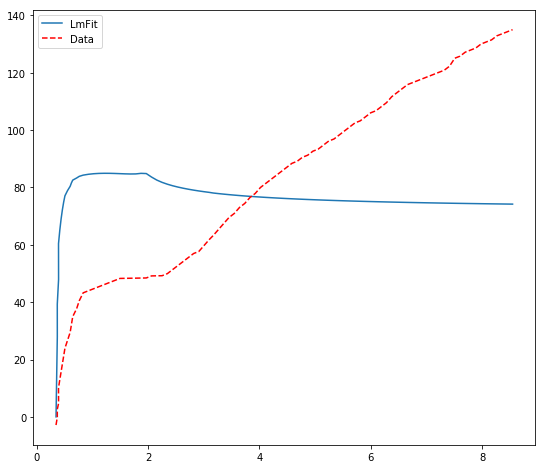

In [20]:
#Plotting

fig = plt.figure(figsize=(9.0,8.0))                                   #size of the plot
plt.plot(r_d_nord,l_curve(r_d_nord,l_c),linestyle='-',label='LmFit')
plt.errorbar(r_d_nord,v_d_nord,fmt='r',label='Data',linestyle='--')   #Plot points (fmt='*o') with error bars
#plt.plot(r_b_nord,ycurve,label='Function')                           #Accepting default style gives us a solid line
#plt.plot(r_b_nord,s_curve,linestyle='--',label='SciPy')              #Plot the scipy curve fit with a dashed line

plt.legend()           #Tells our plot to show a legend
plt.show()             #Depending how your environment is set up, this line may not be necessary, but it won't break anything.